Carregue a base de dados wine do scikit-learn no formato de data frame
[link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

1. visualize as primeiras 7 linhas do dataframe

2. visualize as estatísticas descritivas da base de dados wine

3. Separe os dados em 2 subconjuntos (treinamento e teste)

4. Calcule as acurácias (conjunto de teste) para valores de k de 1 a 11 utilizando as distancias: 'euclidean', 'cityblock', 'chebyshev'

5. Gere os 3 gráficos (para as distâncias) da variação da acurácia com o parâmetro k

6. Selecione o melhor modelo

7. Treine o melhor modelo, calcule a  matriz de confusão e gere a sua figura

8. Aplique ambas normalizações de atributos e repita os itens 4-7 (calcule os parâmtros da normalização usando Xtrain e aplique tal normalização nos subconjuntos X_train e X_test).

**Entregáveis**:

1. Código (notebook `*.ipynb`).

2. Relatório `.pdf` (compile seus resultados e inclua as figuras).

In [25]:
# importa o conjunto de datasets do scikit-learn (que contém o conjunto de dados wine)
from sklearn import datasets
import pandas as pd
import numpy as np
# importa o KNN
from sklearn.neighbors import KNeighborsClassifier
# a função train_test_split para dividir o conjunto de dados em treino e teste
from sklearn.model_selection import train_test_split
# funcoes usadas para analisar os resultados
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
# importa os métodos de normalização de atributos
from sklearn.preprocessing import MinMaxScaler, StandardScaler


wine = datasets.load_wine(as_frame=True)

In [4]:
#1 visualiza as primeiras 7 linhas do dataframe
wine.frame.head(7)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0


In [5]:
#2 visualiza as estatísticas descritivas da base de dados wine
wine.frame.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
#3 Separe os dados em 2 subconjuntos (treinamento e teste)
#3.1 primeiro precisamos separar em arrays do numpy
X, y = datasets.load_wine(return_X_y= True)

#dividir a base em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


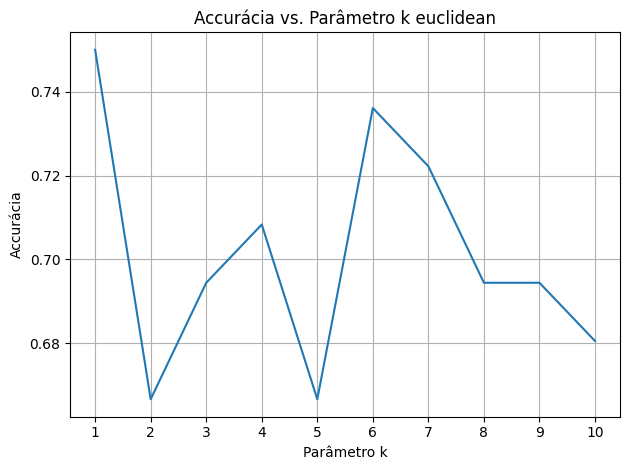

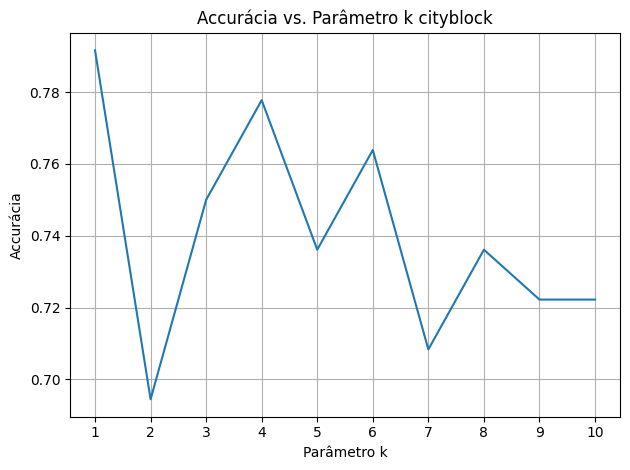

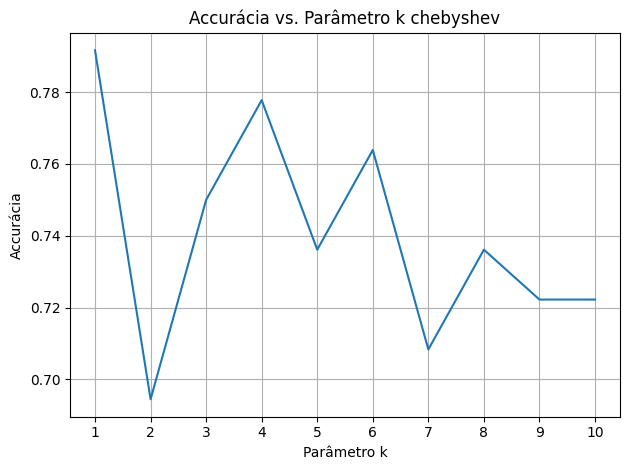

In [19]:
#4 Calcule as acurácias (conjunto de teste) para valores de k de 1 a 11 /
#utilizando as distâncias: 'euclidean', 'cityblock' e 'chebyshev' (SEM NORMALIZAR)
#5 gere os 3 gráficos
#euclidean
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')
plt.title('Accurácia vs. Parâmetro k euclidean')
plt.grid(True)
plt.tight_layout()
plt.show()

#cityblock
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='cityblock')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')
plt.title('Accurácia vs. Parâmetro k cityblock')
plt.grid(True)
plt.tight_layout()
plt.show()

#chebyshev
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='cityblock')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')
plt.title('Accurácia vs. Parâmetro k chebyshev')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
#6 após saber o melhor K
#euclidean
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("euclidean")
print(f'y_pred={y_pred}')
print(accuracy_score(y_pred, y_test))
#cityblock
knn = KNeighborsClassifier(n_neighbors=4, metric='cityblock')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("cityblock")
print(f'y_pred={y_pred}')
print(accuracy_score(y_pred, y_test))
#chebyshev
knn = KNeighborsClassifier(n_neighbors=4, metric='chebyshev')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("chebyshev")
print(f'y_pred={y_pred}')
print(accuracy_score(y_pred, y_test))

euclidean
y_pred=[0 1 1 0 1 1 0 2 1 1 0 1 0 1 0 1 0 0 1 0 1 0 2 1 1 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 2 0 0 1 1 1 0 1 0 0 0 2 2 0 2 0 1 0 0 1 1 1 0 2 2 1 1 2 2 0 2 0 2]
0.7361111111111112
cityblock
y_pred=[0 1 1 0 1 1 0 2 1 1 0 1 0 1 2 1 0 0 1 0 1 0 1 1 1 1 1 1 2 2 0 0 1 0 0 0 1
 1 1 2 2 0 1 1 1 0 2 0 2 0 2 1 0 2 0 1 0 2 1 2 1 0 2 2 1 1 1 1 0 2 0 2]
0.7777777777777778
chebyshev
y_pred=[0 1 1 0 1 1 0 2 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1 1 1 1 1 1 2 1 0 0 1 0 0 0 1
 1 1 2 2 0 1 1 1 2 1 0 2 0 2 1 0 2 0 1 2 2 1 1 1 0 1 2 1 1 1 2 0 1 0 2]
0.7222222222222222


In [22]:
#7.1 treina o modelo cityblock
knn = KNeighborsClassifier(n_neighbors=4, metric='cityblock')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

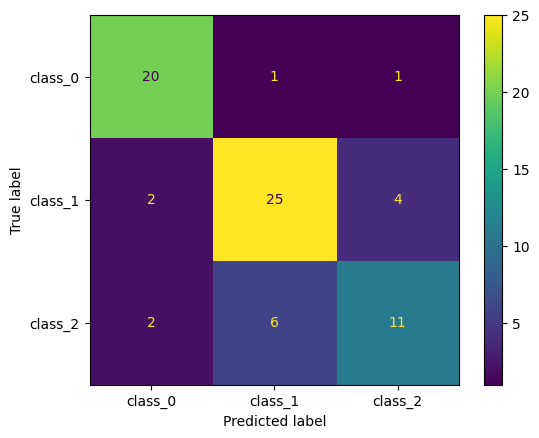

In [23]:
#7.2 calcula e gera a matriz de confusão

# importa uma função para melhor visualizar a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# calcula a matriz de confusão
cm = confusion_matrix(y_test,y_pred)
# constroi um versão mais otimizada para visualização da matriz de confusão
cmd = ConfusionMatrixDisplay(cm, display_labels=list(wine.target_names))
# plota a matriz de confusão
cmd.plot()
plt.show()

In [26]:
#8 Normalizar os atributos e repetir os passos 4 a 7
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

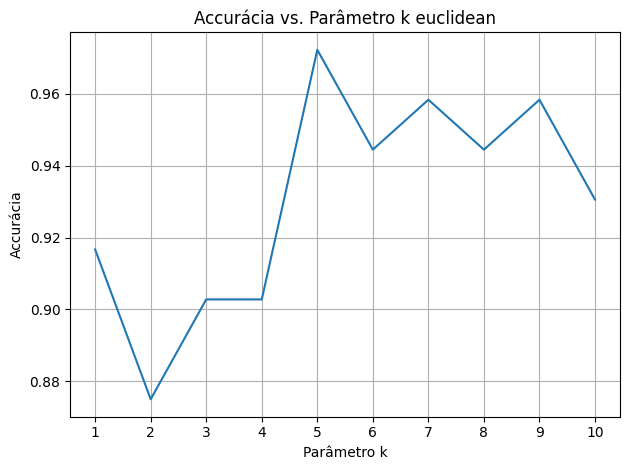

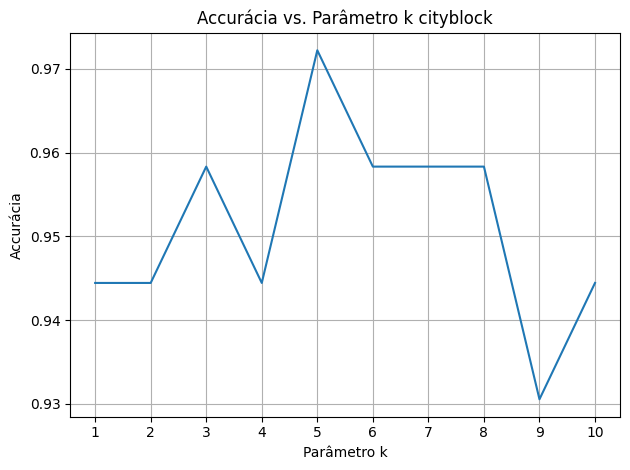

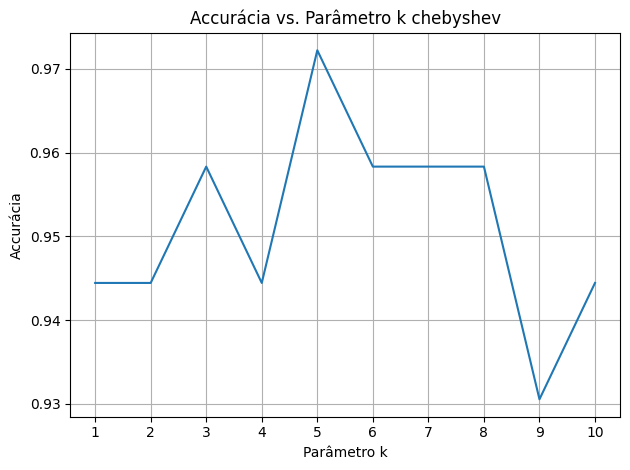

In [27]:
#8.4 Calcule as acurácias (conjunto de teste) para valores de k de 1 a 11 /
#utilizando as distâncias: 'euclidean', 'cityblock' e 'chebyshev' (SEM NORMALIZAR)
#8.5 gere os 3 gráficos

#euclidean
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')
plt.title('Accurácia vs. Parâmetro k euclidean')
plt.grid(True)
plt.tight_layout()
plt.show()

#cityblock
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='cityblock')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')
plt.title('Accurácia vs. Parâmetro k cityblock')
plt.grid(True)
plt.tight_layout()
plt.show()

#chebyshev
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='cityblock')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')
plt.title('Accurácia vs. Parâmetro k chebyshev')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
#8.6 após saber o melhor K = 5
#euclidean#escolhido como melhor modelo
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("euclidean")
print(f'y_pred={y_pred}')
print(accuracy_score(y_pred, y_test))
#cityblock
knn = KNeighborsClassifier(n_neighbors=5, metric='cityblock')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("cityblock")
print(f'y_pred={y_pred}')
print(accuracy_score(y_pred, y_test))
#chebyshev
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("chebyshev")
print(f'y_pred={y_pred}')
print(accuracy_score(y_pred, y_test))

euclidean
y_pred=[0 2 1 0 1 1 0 2 1 1 2 2 0 0 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 2 2 1 1 2 1 0 1 1 1]
0.9722222222222222
cityblock
y_pred=[0 2 1 0 1 1 0 2 1 1 2 2 0 0 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 2 2 1 1 2 1 0 1 1 1]
0.9722222222222222
chebyshev
y_pred=[0 2 1 0 0 0 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 2 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 0 2 0 2 2 0 2 0 1 2 2 1 2 2 0 2 1 1 1 2 1 0 1 0 2]
0.8888888888888888


In [29]:
#8.7.1 treina o modelo euclidean
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

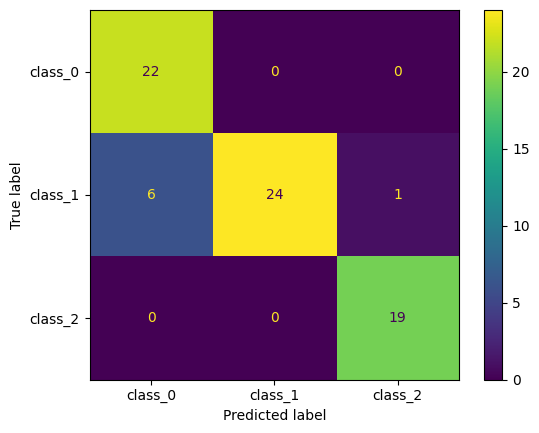

In [30]:
#7.2 calcula e gera a matriz de confusão

# importa uma função para melhor visualizar a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# calcula a matriz de confusão
cm = confusion_matrix(y_test,y_pred)
# constroi um versão mais otimizada para visualização da matriz de confusão
cmd = ConfusionMatrixDisplay(cm, display_labels=list(wine.target_names))
# plota a matriz de confusão
cmd.plot()
plt.show()